<a href="https://colab.research.google.com/github/kiakass/machine-learning/blob/main/gradient_descent_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ H(x) = wx + b $<br>
$ Cost(w) = \dfrac{1}{2} ( wx - y )^2$<br><br>
$ W:= W - \alpha * \dfrac{\partial}{\partial W}Cost,\quad \alpha : learning \; rate $<br>
$ W:= W - \alpha * \dfrac{1}{m} \displaystyle \sum_{i=1}^N \{ (wx - y)*x \} $

In [2]:
import numpy as np
import matplotlib.pyplot as plt

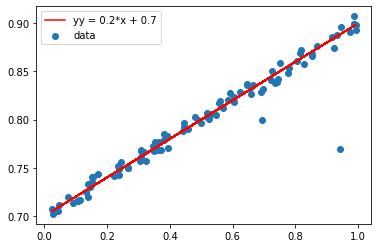

In [86]:
# data 생성 y = wx + b + noise
[w,b,size]=[0.2,0.7,100] 
x = np.random.rand(size)
yy = w * x + b
noise = np.random.uniform(-0.01, 0.01, size=y.shape)
y = yy + noise

# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5] = 0.77
y[10] = 0.8

# graph
#plt.figure(figsize=(10, 5))
a=plt.plot(x, yy, color='r', label=f'yy = {w}*x + {b}')
a=plt.scatter(x, y, label='data')
a=plt.legend()

step:   0, w = -0.03215, b = 0.58683, cost = 0.37623


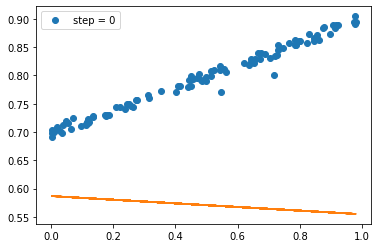

step:  50, w = 0.17914, b = 0.70867, cost = 0.00011


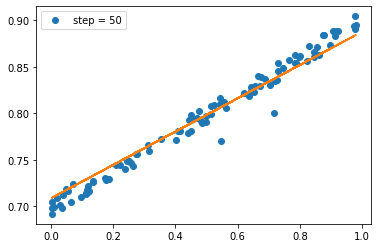

step: 100, w = 0.19822, b = 0.69878, cost = 0.00006


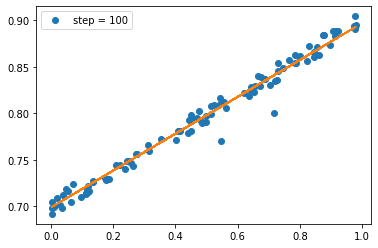

step: 150, w = 0.20134, b = 0.69717, cost = 0.00006


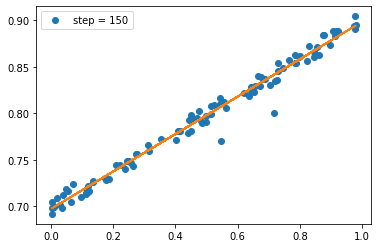

------------------------------------------------------------
final result : step: 199, w = 0.20, b = 0.70, cost = 0.00006


In [79]:
# 최대 반복 횟수
num_epoch = 200

# 학습율 (learning_rate)
learning_rate = 0.5
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    
    #hypothesis
    y_hat = x * w + b

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    #loss : Mean square error
    error = ((y_hat - y)**2).mean()

    if error < 0.00006:
        break

    errors.append(error)
    
    # 그래프 출력
    if epoch % 50 == 0: # step 마다 그래프 출력
        print("step: %3d, w = %.5f, b = %.5f, cost = %.5f" % (epoch,w,b,error))
        plt.plot(x,y,'o', label='step = {}'.format(epoch))
        plt.plot(x,w*x+b)
        plt.legend()
        plt.show()

print("----" * 15)
print("final result : step: %3d, w = %.2f, b = %.2f, cost = %.5f" %(epoch, w, b, error))

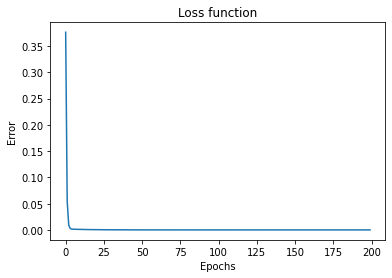

In [82]:
#plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Loss function')
plt.show()